<a href="https://colab.research.google.com/github/sebasDev2001/AI-and-Data-Science-Journey/blob/main/Fuzzy_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 5.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=f9ebe8c00cb91c18a9894bf119b2cfeb78cbd0ca3d26ecb9aef9058ad012b3fe
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import skfuzzy.control as ctrl

In [ ]:
def plot_membfunction(universe, fuzzysets, namesfuzzysets,largo, ancho,namevariable=''):
  plt.figure(figsize=(largo,ancho))
  for fset,n in zip (fuzzysets,namesfuzzysets):
    plt.plot(universe,fset,label=n)
  plt.xlabel(namevariable)
  plt.ylabel('Membresía')
  plt.show()

In [ ]:
universe_petalwidth = np.arange(0.1, 2, 0.01)
v_petalwidth = ['small', 'medium', 'large','xtralarge']
petalwidth_small = fuzz.membership.trapmf(universe_petalwidth, [0.1,0.1,0.6,0.65])
petalwidth_medium = fuzz.membership.trapmf(universe_petalwidth, [0.55,0.61,1.5,1.55])
petalwidth_large = fuzz.membership.trapmf(universe_petalwidth, [1.45,1.51,1.69,1.75])
petalwidth_xtraLarge = fuzz.membership.trapmf(universe_petalwidth, [1.65,1.70,2,2])
petalwidth = [petalwidth_small, petalwidth_medium, petalwidth_large, petalwidth_xtraLarge]

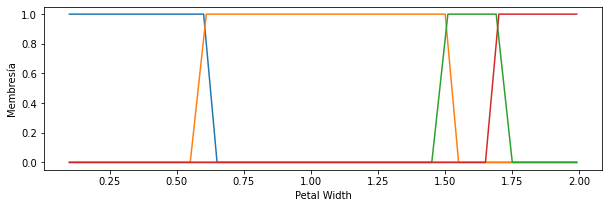

In [ ]:
plot_membfunction(universe_petalwidth,petalwidth,v_petalwidth,10,3,'Petal Width')

In [ ]:
universe_petallength = np.arange(0.05, 6, 0.01)
v_petallength = ['small','medium','large']
petallength_small = fuzz.membership.trapmf(universe_petallength, [0.05,0.05,2,2.2])
petallength_medium = fuzz.membership.trapmf(universe_petallength, [1.8,2.01,4.9,5.1])
petallength_large = fuzz.membership.trapmf(universe_petallength, [4.7,4.91,6,6])
petallenght = [petallength_small,petallength_medium,petallength_large]

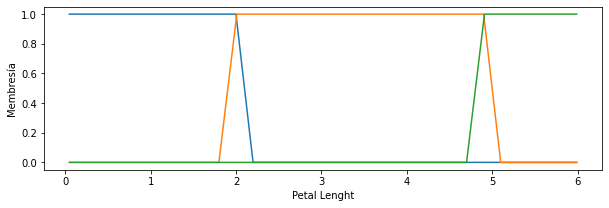

In [ ]:
plot_membfunction(universe_petallength,petallenght,v_petallength,10,3,'Petal Lenght')

In [ ]:
longitudpetalo = 4.5
anchurapetalo = 1.4

In [ ]:
mf_width = [fuzz.interp_membership(universe_petalwidth,x,anchurapetalo) for x in petalwidth]
mf_length = [fuzz.interp_membership(universe_petallength,y,longitudpetalo) for y in petallenght]


In [ ]:
weight_rule1_ant1 = mf_width[v_petalwidth.index('small')]
print(weight_rule1_ant1)
weight_rule1_ant2 = mf_width[v_petalwidth.index('xtralarge')]
print(weight_rule1_ant2)
weight_rule1_ant3 = np.fmin(np.fmax(mf_width[v_petalwidth.index('medium')],mf_width[v_petalwidth.index('large')]),np.fmax(mf_length[v_petallength.index('medium')],mf_length[v_petallength.index('small')]))
print(weight_rule1_ant3)
weight_rule1_ant4 = np.fmin(mf_length[v_petallength.index('large')],mf_width[v_petalwidth.index('medium')])
print(weight_rule1_ant4)
weight_rule1_ant5 = np.fmin(mf_length[v_petallength.index('large')],mf_width[v_petalwidth.index('large')])
print(weight_rule1_ant5)

0.0
0.0
1.0
0.0
0.0


Para las variables de salida(Pesos):


1.   Iris setosa (1)
2.   Iris versicolor (2)
3.   Iris virginica (3)



In [ ]:
tipoflor_ant1 = 1
tipoflor_ant2 = 3
tipoflor_ant3 = 2
tipoflor_ant4 = 3
tipoflor_ant5 = 2
sumapesos = weight_rule1_ant1 + weight_rule1_ant2+ weight_rule1_ant3+weight_rule1_ant4+weight_rule1_ant5
tipoflor = (weight_rule1_ant1*tipoflor_ant1 + weight_rule1_ant2*tipoflor_ant2+weight_rule1_ant3*tipoflor_ant3+ weight_rule1_ant4*tipoflor_ant4+weight_rule1_ant5*tipoflor_ant5)/sumapesos
print(tipoflor)

2.0


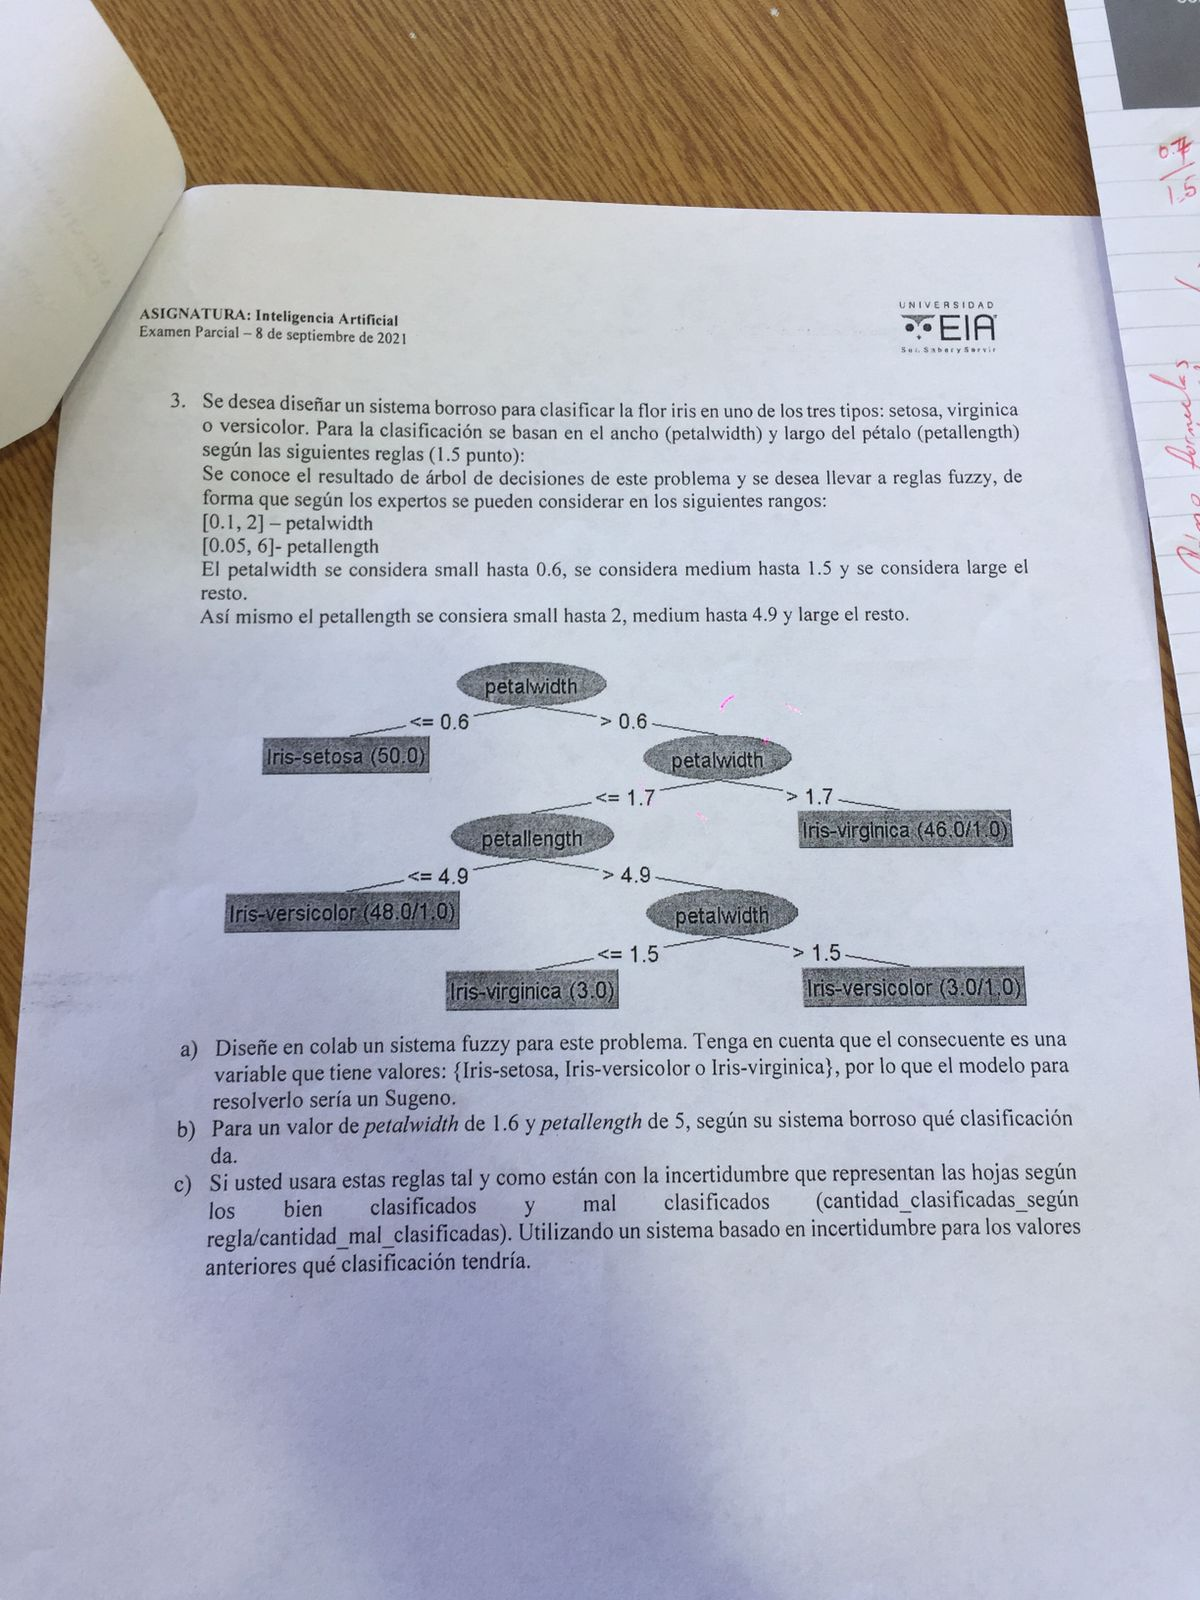